<a href="https://colab.research.google.com/github/WAPiumiNavoda/Deep-Learning-Exercises/blob/main/Regression_with_TensorFlow_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the dataset from kaggle**

In [ ]:
!pip install opendatasets

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od #get the dataset from kaggle

In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")#download the dataset

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: piuminavoda
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 2.72MB/s]

In [ ]:
data = pd.read_csv("random-linear-regression/test.csv")#load the dataset

### **Data Preprocessing**

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
#divide datset to X and Y
X = data['x']
Y = data['y']

In [ ]:
X

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

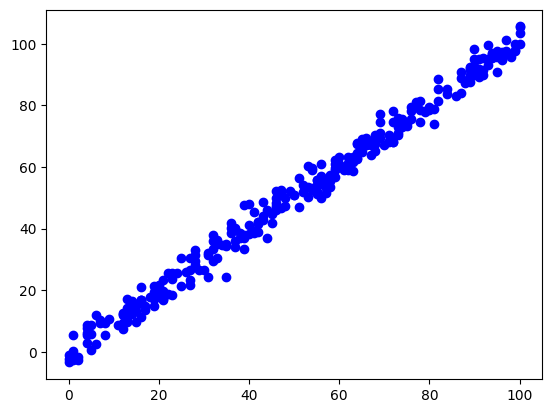

In [ ]:
plt.scatter(X,Y, c='b')
plt.show

In [ ]:
# divide data set for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape

((240,), (60,))

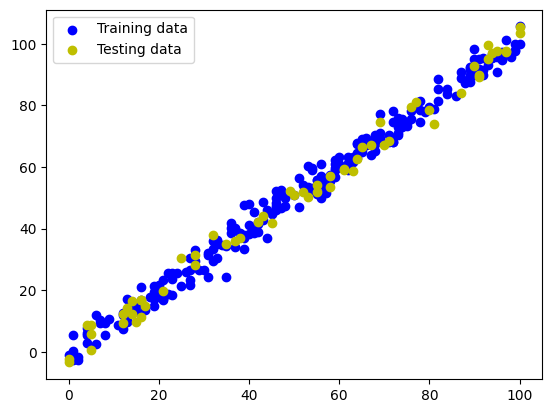

In [ ]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

## **Model Building**

In [ ]:
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14,input_shape=(1,)), # give number of nurones inside hidden layer
    tf.keras.layers.Dense(10,input_shape=(1,)),
    tf.keras.layers.Dense(1) #output layer
])


#Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.05),
              metrics = ['mae']
             )

#train model
epoch_number = 10
history = model.fit(tf.expand_dims(X_train, axis =1),y_train, epochs =  epoch_number) #give as 2D array

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 57.5156 - mae: 57.5156
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 46.3196 - mae: 46.3196
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 34.7147 - mae: 34.7147
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 22.8755 - mae: 22.8755
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 11.3134 - mae: 11.3134
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 3.4380 - mae: 3.4380
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 5.0354 - mae: 5.0354
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 2.8426 - mae: 2.8426
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 3.1257 - mae: 3.1257
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 2.6714 - mae: 2.6714


# **Evaluate Model**

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 14)                28        
                                                                 
 dense_32 (Dense)            (None, 10)                150       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_predictions = model.predict(X_test)
y_predictions[:5]

2/2 [==============================] - 0s 6ms/step


array([[92.83586  ],
       [78.47102  ],
       [96.94009  ],
       [ 5.6208177],
       [93.8619   ]], dtype=float32)

In [ ]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

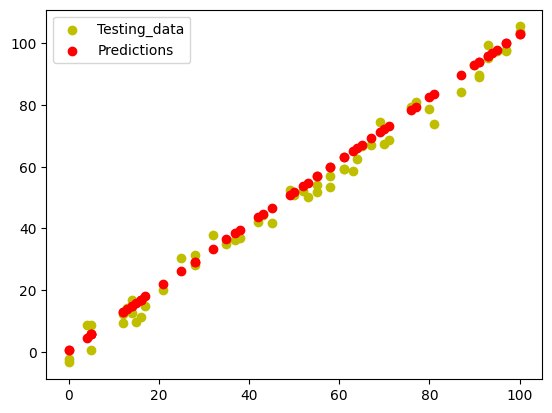

In [ ]:
# plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test,y_predictions, c='r', label='Predictions')
plt.legend()
plt.show()

In [ ]:
# Using evaluate method
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2.8886 - mae: 2.8886


[2.8886115550994873, 2.8886115550994873]

In [ ]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.888612>

In [ ]:
y_predictions.shape #have as 2D

(60, 1)

In [ ]:
y_test.shape #have as 1D

(60,)

In [ ]:
tf.squeeze(y_predictions).shape

TensorShape([60])

In [ ]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.373055>

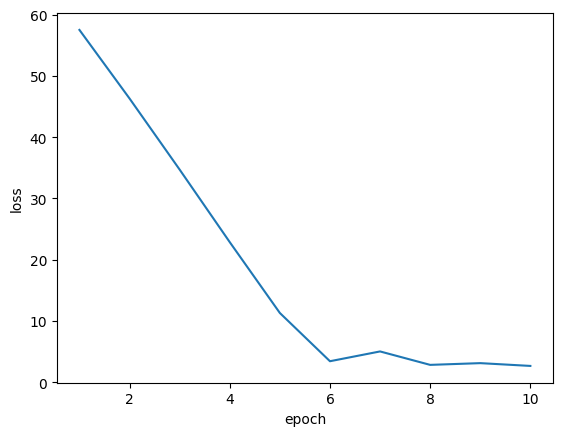

In [ ]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
history.history

{'loss': [57.51557540893555,
  46.31955337524414,
  34.71470642089844,
  22.875486373901367,
  11.313389778137207,
  3.4379820823669434,
  5.03537654876709,
  2.842560291290283,
  3.1256539821624756,
  2.6714048385620117],
 'mae': [57.51557540893555,
  46.31955337524414,
  34.71470642089844,
  22.875486373901367,
  11.313389778137207,
  3.4379820823669434,
  5.03537654876709,
  2.842560291290283,
  3.1256539821624756,
  2.6714048385620117]}

### **Model Weights and Baises**

In [ ]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-0.4498282  -0.03973903 -0.60095644  0.02453338  0.14753868  0.27240583
   0.55205184  0.14766265  0.3049465  -0.12888633  0.4506565   0.39493522
   0.17654052  0.6098569 ]] 
Biases:
 [ 0.04085715  0.04149969 -0.04532066 -0.04096933 -0.04145866  0.04268565
 -0.03630065  0.04282976  0.04281573  0.04138929  0.04361992  0.04270272
 -0.04163114  0.01041296]

Weights:
 [[-0.29707593 -0.18612911 -0.4940733  -0.22041051 -0.30836543 -0.3182361
   0.01939946  0.24877182  0.09182207  0.09897386]
 [ 0.16244121 -0.0180939   0.08616768  0.4562955  -0.06926318 -0.14757712
   0.18028815 -0.09982415  0.37139416 -0.07404021]
 [-0.2051236  -0.140933   -0.4414908   0.01114368  0.05298133 -0.19979455
  -0.11728697  0.03229757  0.3835169  -0.17515534]
 [ 0.516193   -0.22839178 -0.1614651  -0.2707525   0.23107232  0.42360315
  -0.0181897   0.0419361   0.04441036  0.13539796]
 [ 0.05851595  0.20266035  0.1452861   0.28595528  0.34306386 -0.15205584
   0.02698848 -0.38710526 -0.10440088 -0.257285